### Logistic Regression using Python (Single Layer Single Node Neural Network)
#### Here we perform Logistic Regression first with Sigmoid activation and then with Softmax Activation
#### One hidden layer signmoid activation
#### One hidden layer softmax activation



In [ ]:
'''
Here are the columns ; 'user_action' is the label.

is_mobile,n_products_view,visit_durtion,is_returning_visitor,time_of_day,user_action 

=======
Feature
=======
is_mobile - 0/1
n_products_view - int > 0
visit_duration - real > 0
is_returning_visitor - 0/1
time_of_day -
0 - 12:00 - 6:00 am
1 - 6:00 am - 12:00 pm
2 - 12:00 pm - 6:00 pm
3 - 6:00 pm - 12:00 am

=======
Label
=======
User_Action - 
Binary - 1/0 (converted/not-converted)
MultiClass - 0/1/2/3 (bounce,add-to-cart,begin-checkout,finish-checkout)

'''

In [5]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# so scripts from other folders can import this file
# dir_path = os.path.abspath(os.path.dirname(os.path.realpath(__file__)))

# normalize numerical columns
# one-hot categorical columns

# df = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/My_Mini_Projects/NLP_Data/fake_or_real_news.csv')


def get_data():
  
    df = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/DataSets/ecommerce_data.csv')

  # just in case you're curious what's in it
    df.head()

  # easier to work with numpy array
    data = df.values

  # shuffle it
    np.random.shuffle(data)

  # split features and labels
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)
    
    # one-hot encode the categorical data
    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

      # one-hot
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

  
    # assign X2 back to X, since we don't need original anymore
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest
    
    
def get_binary_data():
    # return only the data from the first 2 classes
        Xtrain, Ytrain, Xtest, Ytest = get_data()
        X2train = Xtrain[Ytrain <= 1]
        Y2train = Ytrain[Ytrain <= 1]
        X2test = Xtest[Ytest <= 1]
        Y2test = Ytest[Ytest <= 1]
        return X2train, Y2train, X2test, Y2test

0 1.04024925074 0.899125143914
1000 0.154471053671 0.290439183086
2000 0.15259458745 0.297200290478
3000 0.152366233173 0.3001304542
4000 0.152330389704 0.301377421093
5000 0.152324272839 0.301906088693
6000 0.152323194574 0.302130319605
7000 0.15232300196 0.302225484409
8000 0.152322967362 0.302265887234
9000 0.152322961132 0.302283043465
Final train classification_rate: 0.980582524272
Final test classification_rate: 0.955056179775


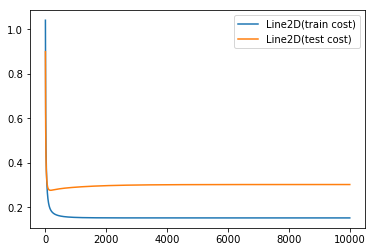

In [6]:
# get the data
Xtrain, Ytrain, Xtest, Ytest = get_binary_data()

# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()




### Logistic using Softmax 

0 0.832882530208 0.782513520519
1000 0.0849414568927 0.115040068718
2000 0.0797653535294 0.111362687942
3000 0.0777124854242 0.111008927056
4000 0.0766058077991 0.111353876972
5000 0.0759088072509 0.111881297722
6000 0.0754264212284 0.11244588946
7000 0.0750709513808 0.113000587493
8000 0.0747971249566 0.113530048442
9000 0.0745791605159 0.114030306538
Final train classification_rate: 0.9225
Final test classification_rate: 0.86


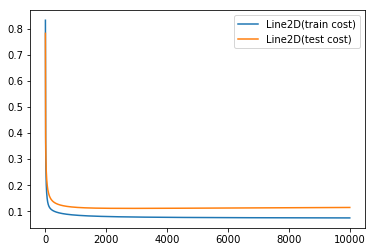

In [7]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

Xtrain, Ytrain, Xtest, Ytest = get_data()
D = Xtrain.shape[1]
K = len(set(Ytrain) | set(Ytest))

# convert to indicator
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

# randomly initialize weights
W = np.random.randn(D, K)
b = np.zeros(K)

# make predictions
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W, b):
    return softmax(X.dot(W) + b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))


# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()